<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_fall_2022/blob/main/exercises/Ph_2320_E12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 12 (Workshop 13)

Consider a mass attached to a spring that allows the mass to oscillate about its equilibrium position $x_0 = 0$ meters as shown below. The equilibrium position is that in which the spring is neither compressed nor elongated. 

.

In panel (d), the mass is at $x_0$ and has maximum velocity moving to the right. As soon as the mass is to the right of the equilibrium position, the spring is elongated and produces a force in the negative direction. There is also friction $\vec{f_k}$ in the direction opposite to the velocity. The spring force $F_s$ increases in magnitude with the elongation of the spring according to Hooke's law, $F_s = -k \Delta \vec{x}$, were $k$ is the spring constant and $\Delta \vec{x}$ is the displacement from equilibrium. Since the velocity is in the positive direction and the acceleration is in the negative direction, the mass eventually stops at some distance $A$ from equilibrium, as shown in panel (a). There is still a force pulling the mass towards the origin, so the mass will accelerate in the negative direction, with an acceleration that is decreasing in magnitude until it becomes zero at the origin. At this stage, the velocity will be maximal and in the negative direction, as shown in panel (b). 

.

As soon as the mass is to the left of the equilibrium position, the spring is compressed and produces a force in the positive direction according to Hooke's law. There is also friction $\vec{f_k}$ in the direction opposite to the velocity. Since the velocity is in the negative direction and the acceleration is in the positive direction, the mass eventually stops at some distance $-A$ from equilibrium, as shown in panel (c). The whole cycle then repeats, but each time with less energy since the friction is always removing energy from the system. This is a [damped harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator). 



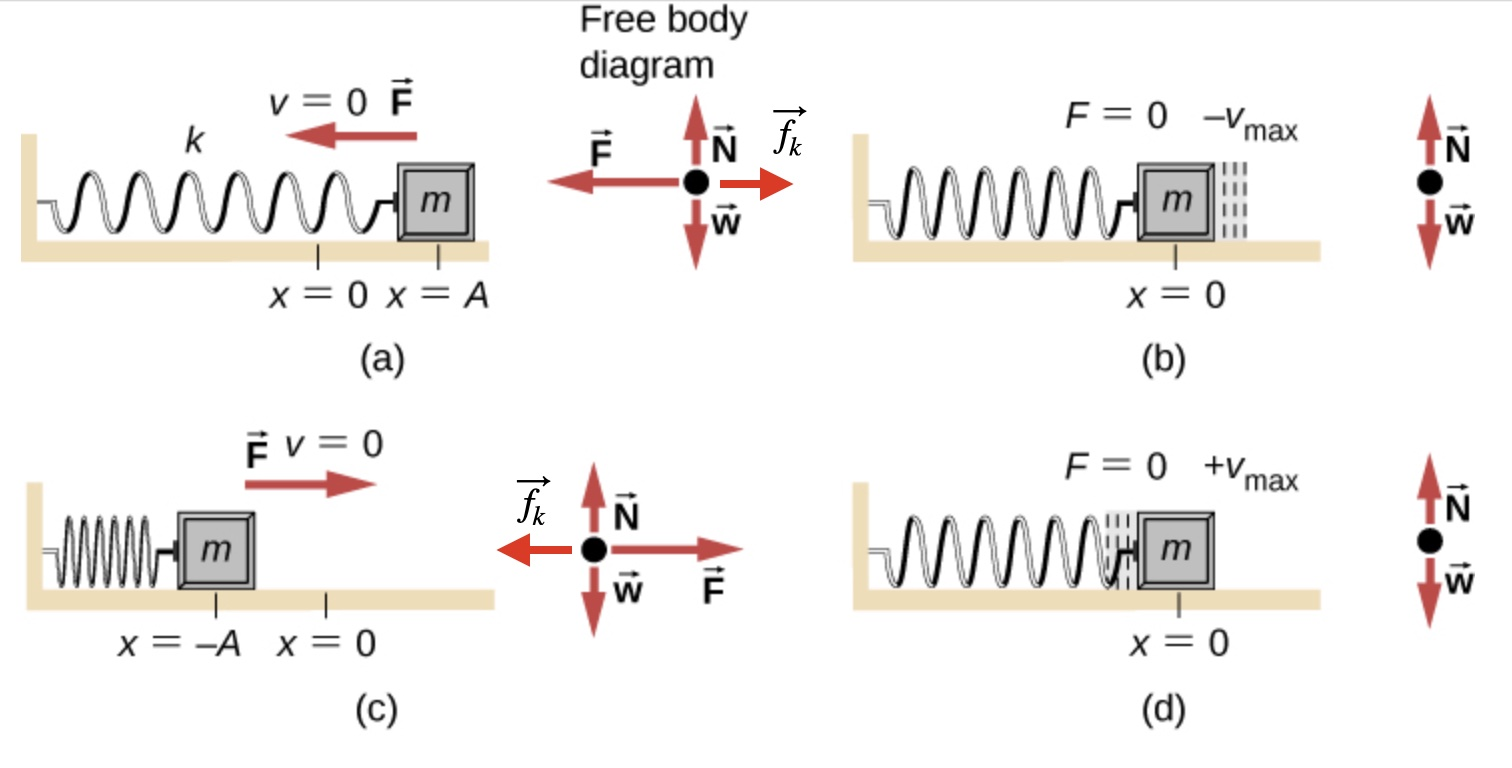

For this exercise, you will put together the main concepts that you have learned about so far in this class: kinematic equations, forces, conservation of energy, and conservation of momentum. In particular, you will learn about impulse and momentum:

.

$\vec{J} = \int{\vec{F} dt} = \Delta \vec{p}$

.

or, in 1 dimension along the $x$-axis,

.

$J_x = \int{F_x dt} = \Delta p_x$

.

Initially, you will simulate a mass of $m=1$ kg attached to a one-dimensional spring of spring constant $k=1$ N/m oscillating about its equilibrium position. The equilibrium position will be $x_0 = 0$ m and at time $t=0$ s, the mass will be at its equilibrium and will be moving to the right at $v=1$ m/s. Since the spring force is zero at the equilibrium position, the acceleration at $t=0$ is $a=0$ m/s$^2$. We set the initial conditions by giving appropriate values to the python variables. We will not consider friction, so the coefficient of kinetic friction, $\mu_k = 0.000$. The potential energy we will investigate is given by:

.

$U_{\rm q} = \frac{1}{2} \left[ k (\Delta \vec{x})^2 \right]^2 -  \left[ \frac{1}{2}k (\Delta \vec{x})^2 \right]$


In [1]:
# Make our lives easier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialization
position = 0.0 # position in meters
velocity = 1.0 # velocity in meters per second
acceleration = 0.0 # acceleration in meters per second^2
force = 0.0 # force in Newtons
time = 0.0 # time in seconds
spring_constant = 1.0 # force constant in kg/second^2
mass = 1.0 # mass in kg
time_step = 0.001 # time step in seconds
g = 9.8 # acceleration due to gravity m/s^2
mu = 0.000 # coefficient of kinetic friction


The following *molecular dynamics* code uses the kinematic equations to continually update the position, velocity and, by taking the derivative of the given potential, the force exerted on and the acceleration of the mass. The kinematic equations arise from integrating the equations of motion with constant acceleration, which does not occur in the case of the mass/spring system since the force (and hence the acceleration) is a function of the displacement. Nevertheless, the acceleration is constant if the time step we consider is infinitesimally small. A computer can approximate this by using very small time steps. For our simulation, a time step $\Delta t = 0.01$ s produces good results. The results are plotted below the code.

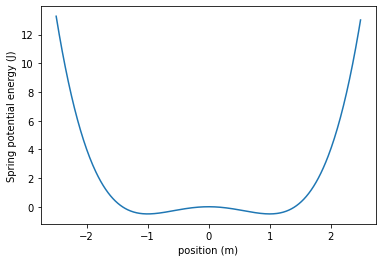

In [3]:
# 'sombrero' potential
potential_series = pd.Series([(1/2)*spring_constant*(x/100)**4 - (1/1)*spring_constant*(x/100)**2 for x in range(-250,250)], index=[x/100 for x in range(-250,250)])
potential_series.plot(xlabel="position (m)", ylabel="Spring potential energy (J)")

In [4]:
# Since the force is the negative derivative of the potential energy 
# with respect to the displacement, create a python function to do just that
def take_derivative_at(potential_series, position):
  # Find the index of the series that is closest to place where you will take the derivative
  diff = np.inf
  closest = 0
  for index, pos in enumerate(potential_series.index):
    if abs(position - pos) < diff:
      diff = abs(position - pos)
      closest = index

  # Find the index of the series that is closest to the start time
  rise = potential_series.iloc[closest+1] - potential_series.iloc[closest-1]
  run = potential_series.index[closest+1] - potential_series.index[closest-1]
  slope = rise/run

  return slope

In [5]:
# Creating Arrays
time_list = [time]
position_list = [position]
velocity_list = [velocity]
acceleration_list = [acceleration]
force_list = [force]

# Starting Loop
i=1
while i < 200000:
    time = time + time_step
    position = position + velocity*time_step + (1/2)*(acceleration*time_step**2)
    velocity = velocity + acceleration*time_step
    #spring_force = -spring_constant*position
    spring_force = -1*take_derivative_at(potential_series=potential_series, position=position)

    if velocity < 0: # moving to the left
      friction_force = mu*mass*g #friction to the right
    else: # moving to the right
      friction_force = -mu*mass*g

    if abs(velocity) < 0.001: # if moving extremely slowly
      friction_force = 0 # no friction because almost not moving

    force = spring_force + friction_force

    acceleration = force/mass
    time_list.append(time)
    position_list.append(position)
    velocity_list.append(velocity)
    acceleration_list.append(acceleration)
    force_list.append(force)
    i = i + 1

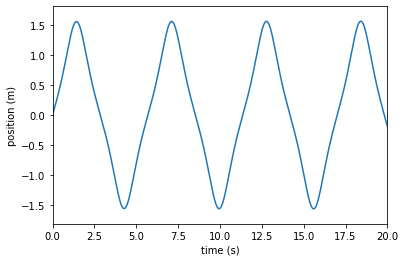

In [6]:
position_series = pd.Series(position_list, index=time_list)
position_series.plot(ylabel="position (m)", xlabel="time (s)", xlim=(0, 20))

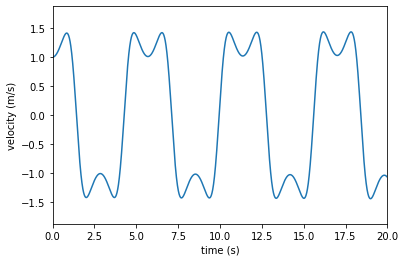

In [7]:
velocity_series = pd.Series(velocity_list, index=time_list)
velocity_series.plot(ylabel="velocity (m/s)", xlabel="time (s)", xlim=(0, 20))

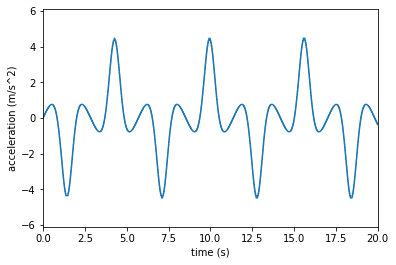

In [8]:
acceleration_series = pd.Series(acceleration_list, index=time_list)
acceleration_series.plot(ylabel="acceleration (m/s^2)", xlabel="time (s)", xlim=(0, 20))

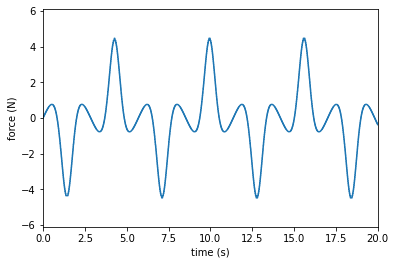

In [9]:
force_series = pd.Series(force_list, index=time_list)
force_series.plot(ylabel="force (N)", xlabel="time (s)", xlim=(0, 20))#, ylim=(-6,6))

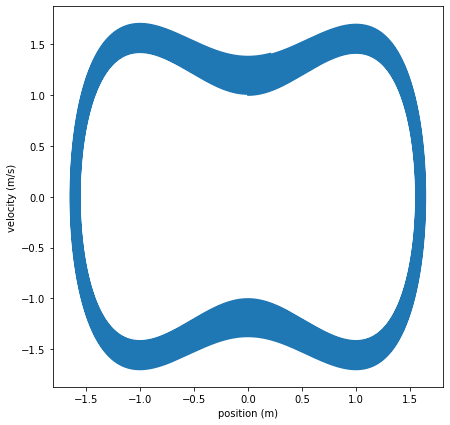

In [10]:
phase_series = pd.Series(velocity_series.values, index=position_series.values)
phase_series.plot(xlabel="position (m)", ylabel="velocity (m/s)", figsize=(7,7))

## Action items

 1. By visual inspection, identify the times $t$ at which there are local and global minima and maxima in force_series . You can modify the range of the horizontal axis by changing xlim. For example, xlim=(0, 10)) will show you only the first 10 seconds. 

 2. The impulse was defined in the introduction, and below you can find a Python function to perform the integration (with an example). Using your previous answer, compute the impulse between a global minimum and a global maximum and between a global minimum and a local maximum. Are they they equal or not? Explain using physics arguments. 

 3. What are the differences and similarities between the Python functions take_derivative_at() and integrate_between() ?

 4. In the simulation, change the value of the coefficient of friction so that mu = 0.002 and run the code again. It is a good idea to restart the session runtime. Change xlim=(0, 200) for the position, velocity, acceleration, and force series to visualize these quantities for the whole simulation time. Explain the similarities and differences of position, velocity, acceleration, force, and phase when friction is included in the simulation. Is mechanical energy conserved in the system?

 5. Repeat 1 and 2 but in the case in which friction is present. 


In [11]:
# Since the impulse is the integral of the force with respect to time 
# create a python function to do that
def integrate_betweeen(force_series, time_start, time_end):
  # Find the index of the series that is closest to the start time
  diff = np.inf
  closest_start = 0
  for index, time in enumerate(force_series.index):
    if abs(time_start - time) < diff:
      diff = abs(time_start - time)
      closest_start = index

  # Find the index of the series that is closest to the end time
  diff = np.inf
  closest_end = 0
  for index, time in enumerate(force_series.index):
    if abs(time_end - time) < diff:
      diff = abs(time_end - time)
      closest_end = index

  # The integral is approximately rise times run
  rise = force_series.iloc[closest_end] - force_series.iloc[closest_start]
  run = force_series.index[closest_end] - force_series.index[closest_start]
  integral = rise*run

  return integral

In [12]:
# Usage example
integrate_betweeen(force_series, time_start=0.0, time_end=20.0)

-7.324880000000534